In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


See the Kaggle website for more information about the variables/features.

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# FEATURE: PASSENGERID

In [8]:
train['PassengerId'].nunique()

891

In [9]:
train['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

PassengerID doesn't seem to be affecting target 'Survived' in any way. So, we ignore this for now.

In [10]:
df=pd.DataFrame()

# Feature: Survived

Survived is our target column, so we'd examine this.

In [11]:
train['Survived'].isnull().sum()

0

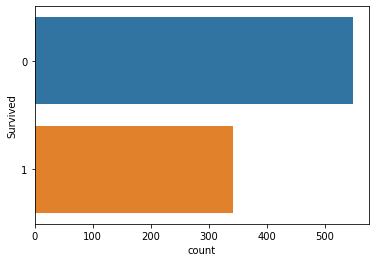

In [12]:
sns.countplot(y=train['Survived'])

This doesn't have an imbalanced class problem.

In [13]:
df['Survived']=train['Survived']

# FEATURE:PCLASS

In [14]:
train['Pclass'].unique()

array([3, 1, 2])

In [15]:
train['Pclass'].isnull().sum()

0

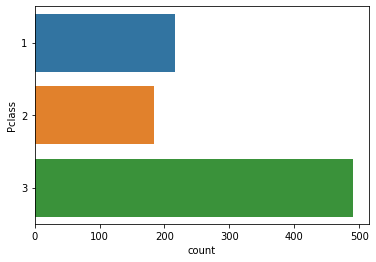

In [16]:
sns.countplot(y=train['Pclass'])

Pclass does have a representation which we can juice further.

In [17]:
df['Pclass']=train['Pclass']

# Feature:Name

In [18]:
train['Name'].nunique()

891

In [19]:
train['Name'].isnull().sum()

0

Do names help in deciding survival? Obviously not, but their titles may.

In [20]:
titles=train['Name'].str.findall('\w+\.').str[0].str.split('.').str[0]

In [21]:
titles.nunique()

17

In [22]:
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

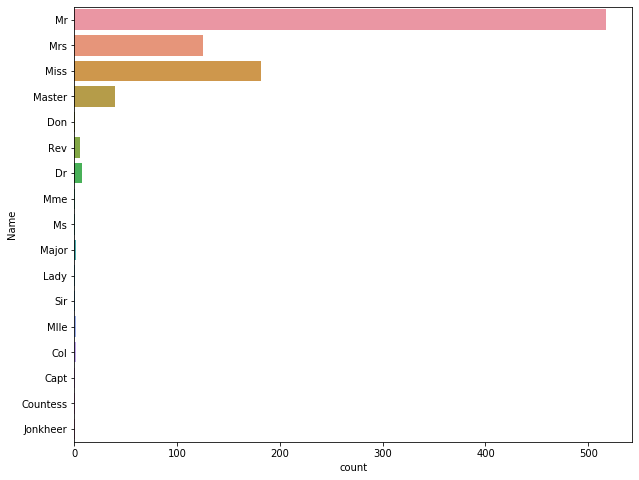

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(y=titles)

As we can see, many sparse classes are created in the name list, that may directly or indirectly had a hand in survival rate.

In [24]:
master=titles[titles=='Master'].index
master

Int64Index([  7,  16,  50,  59,  63,  65,  78, 125, 159, 164, 165, 171, 176,
            182, 183, 193, 261, 278, 305, 340, 348, 386, 407, 445, 480, 489,
            549, 709, 751, 755, 787, 788, 802, 803, 819, 824, 827, 831, 850,
            869],
           dtype='int64')

In [25]:
train.iloc[master]['Survived'].value_counts()

1    23
0    17
Name: Survived, dtype: int64

In [26]:
titles=titles.replace(['Don', 'Rev','Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess',
       'Jonkheer'],'Rare')

In [27]:
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Mme', 'Ms', 'Mlle'],
      dtype=object)

In [28]:
titles=titles.replace(['Miss','Mlle'],'Ms')

In [29]:
titles=titles.replace('Mme','Mrs')

In [30]:
titles.unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Rare'], dtype=object)

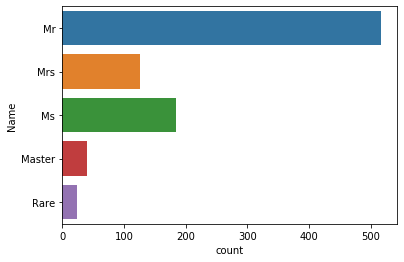

In [31]:
sns.countplot(y=titles)

In [32]:
df['Titles']=titles

In [33]:
df

,Survived,Pclass,Titles
0,0,3,Mr
1,1,1,Mrs
2,1,3,Ms
3,1,1,Mrs
4,0,3,Mr
...,...,...,...
886,0,2,Rare
887,1,1,Ms
888,0,3,Ms
889,1,1,Mr


# Feature:Sex

In [34]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [35]:
train.Sex.isnull().sum()

0

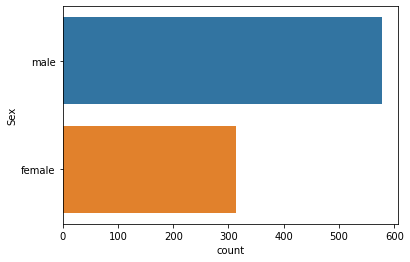

In [36]:
sns.countplot(y=train.Sex)

In [37]:
df['Sex']=train['Sex']

# Feature:Age

In [38]:
train['Age'].isnull().sum()

177

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

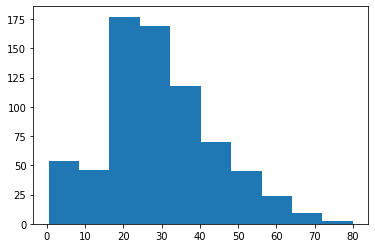

In [39]:
plt.hist(train['Age'])

We've got maximum of our Ages in the 20-30 range, whether or not they survived is to be found out. Some old people were also present in fewer numbers.
The least age seems to be around 0., and the highest age seems to be around 80.

In [40]:
df['Age']=train['Age']

# Feature:SibSp

SibSp is a numeric categorical variable, and represents number of Sibling aboard the Titanic.

In [41]:
train['SibSp'].isnull().sum()

0

In [42]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

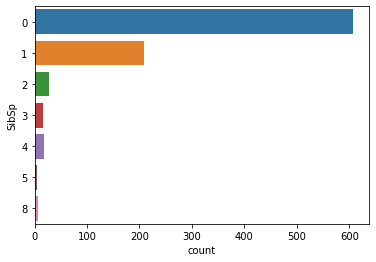

In [43]:
sns.countplot(y=train['SibSp'])

You have some sparse classes, so it may be better to classify it as Small Family, Medium Family, etc, or Single/Not single.

In [44]:
df['SibSp']=train['SibSp']

# Feature: Parch

In [45]:
train['Parch'].isnull().sum()

0

In [46]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

Again a family is made up of parents, children and siblings. So we can combine SibSp and Parch to show a family size.

In [47]:
df['Parch']=train['Parch']

In [48]:
train['Ticket'].isnull().sum()

0

In [49]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [50]:
train['Ticket'].duplicated().sum()

210

Some of the tickets are duplicated, so maybe they shared a berth?

# Feature: Fare

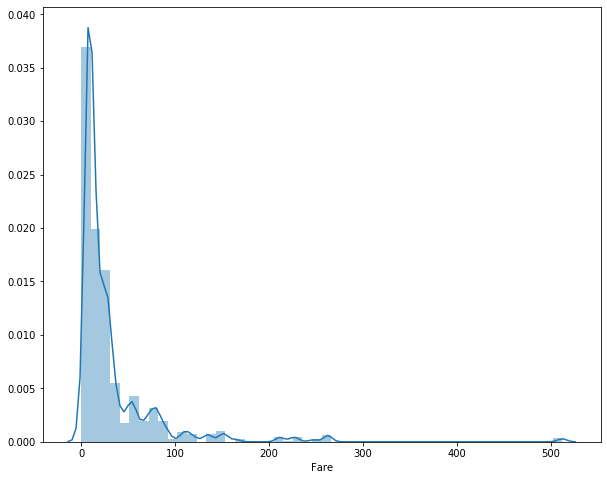

In [51]:
plt.figure(figsize=(10,8))
sns.distplot(train['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

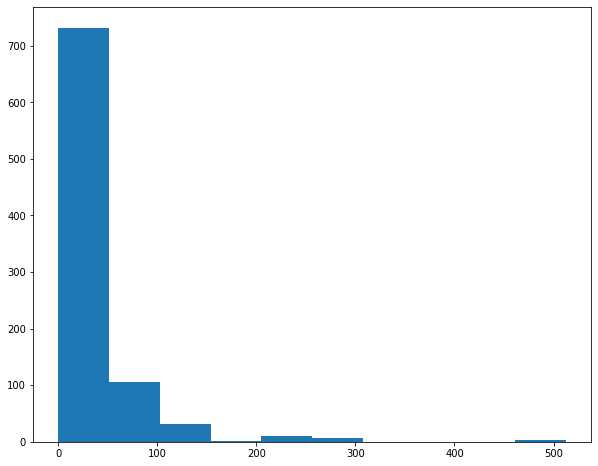

In [52]:
plt.figure(figsize=(10,8))
plt.hist(train['Fare'])

Some of the fare points don't really have elements in it. Could we bin it?

In [53]:
df['Fare']=train['Fare']

# Feature: Cabin

In [54]:
train['Cabin'].isnull().sum()

687

Huge number of missing values. Pass!

# Feature: Embarked

In [55]:
train['Embarked'].isnull().sum()

2

In [56]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [57]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
train['Embarked'].mode()[0]

'S'

In [59]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [60]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [61]:
df['Embarked']=train['Embarked']

In [62]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Ms,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,male,27.0,0,0,13.0000,S
887,1,1,Ms,female,19.0,0,0,30.0000,S
888,0,3,Ms,female,NaN,1,2,23.4500,S
889,1,1,Mr,male,26.0,0,0,30.0000,C


# Bivariate Analysis

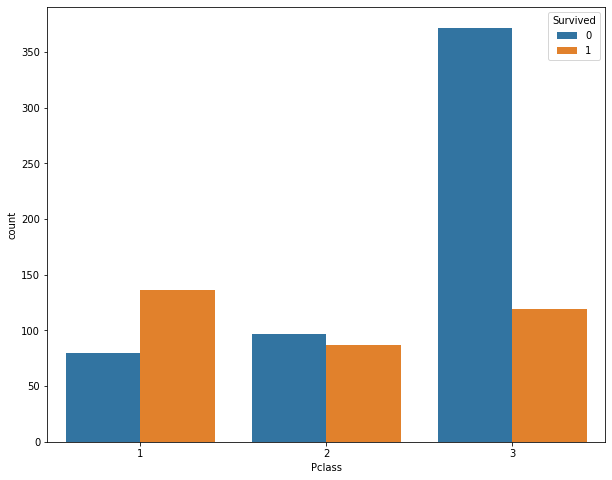

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(df['Pclass'],hue=df['Survived'])

Pclass definitely has a relation with the target variable. As we can see, the number of casualities is decreasing as we move from Class 3 to Class 1, and survival rates for Class 1 and 2 is better than that of Class 3.
We can consider a case for a new feature which asks, is the person from Class 1 or not as survival seems to be in favor of Class 1 people.

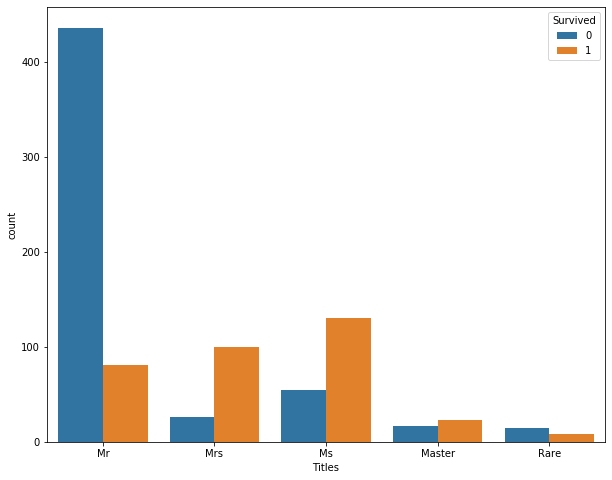

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(df['Titles'],hue=df['Survived'])

The Survival rates seem to be in high favor of Women, girls and boys, with a high mortality rate for the men. Also, the rare titles too, have a higher death count than survival count.

In [65]:
df.groupby('Titles')['Age'].mean()

Titles
Master     4.574167
Mr        32.368090
Mrs       35.788991
Ms        21.845638
Rare      45.545455
Name: Age, dtype: float64

Can the age column be filled up by these guys?

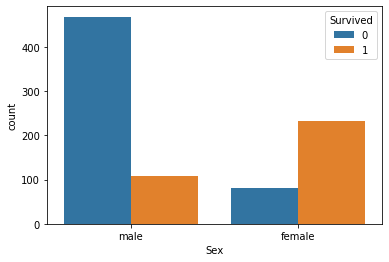

In [66]:
sns.countplot(df['Sex'],hue=df['Survived'])

As expected, Females survived far more than males. Also, you can encode the Sex column by 0-Male, and 1-Female at a later point.

The 'Age' feature seemed to be missing some values.

In [67]:
df['Sex']=df['Sex'].apply(lambda x:0 if x=='male' else 1)

In [68]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,0,22.0,1,0,7.2500,S
1,1,1,Mrs,1,38.0,1,0,71.2833,C
2,1,3,Ms,1,26.0,0,0,7.9250,S
3,1,1,Mrs,1,35.0,1,0,53.1000,S
4,0,3,Mr,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,0,27.0,0,0,13.0000,S
887,1,1,Ms,1,19.0,0,0,30.0000,S
888,0,3,Ms,1,NaN,1,2,23.4500,S
889,1,1,Mr,0,26.0,0,0,30.0000,C


In [69]:
df.groupby(['Titles','Sex'])['Age'].mean()

Titles  Sex
Master  0       4.574167
Mr      0      32.368090
Mrs     1      35.788991
Ms      1      21.845638
Rare    0      45.894737
        1      43.333333
Name: Age, dtype: float64

In [70]:
df.groupby(['Titles','Parch','Sex'])['Age'].mean()#apply(lambda x:x.isnull().sum())

Titles  Parch  Sex
Master  0      0      12.000000
        1      0       3.696000
        2      0       5.250000
Mr      0      0      32.204286
        1      0      33.848485
        2      0      30.454545
        3      0      16.000000
        4      0      52.000000
        5      0      39.000000
Mrs     0      1      35.267857
        1      1      37.419355
        2      1      31.090909
        3      1      37.500000
        4      1      37.000000
        5      1      39.250000
        6      1      43.000000
Ms      0      1      27.686170
        1      1       9.895833
        2      1      13.387097
Rare    0      0      45.529412
               1      43.333333
        1      0      49.000000
Name: Age, dtype: float64

In [71]:
df['Relatives']=df['Parch']+df['SibSp']

In [72]:
df['Relatives'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [73]:
df.groupby(['Titles','Sex','Relatives'])['Age'].mean()

Titles  Sex  Relatives
Master  0    1             6.140000
             2             3.717692
             3             3.480000
             4             2.000000
             5             5.000000
             6             5.333333
             7             7.000000
             10                 NaN
Mr      0    0            32.388316
             1            33.319672
             2            32.030303
             3            29.200000
             4            16.000000
             5            30.600000
             6            39.000000
             7            14.000000
             10                 NaN
Mrs     1    0            40.764706
             1            34.520833
             2            35.040000
             3            30.555556
             4            43.666667
             5            37.250000
             6            38.500000
             7            43.000000
Ms      1    0            27.654321
             1            20.717391
     

In [74]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,Mr,0,22.0,1,0,7.2500,S,1
1,1,1,Mrs,1,38.0,1,0,71.2833,C,1
2,1,3,Ms,1,26.0,0,0,7.9250,S,0
3,1,1,Mrs,1,35.0,1,0,53.1000,S,1
4,0,3,Mr,0,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,0,27.0,0,0,13.0000,S,0
887,1,1,Ms,1,19.0,0,0,30.0000,S,0
888,0,3,Ms,1,NaN,1,2,23.4500,S,3
889,1,1,Mr,0,26.0,0,0,30.0000,C,0


In [75]:
df.groupby(['Titles','Survived','Sex'])['Age'].mean()

Titles  Survived  Sex
Master  0         0       5.400000
        1         0       3.984286
Mr      0         0      32.231118
        1         0      33.044776
Mrs     0         1      36.086957
        1         1      35.709302
Ms      0         1      18.853659
        1         1      22.981481
Rare    0         0      45.214286
        1         0      47.800000
                  1      43.333333
Name: Age, dtype: float64

In [76]:
df['Age']=df.groupby(['Titles','Survived','Pclass'])['Age'].apply(lambda x:x.fillna(x.mean()))

In [77]:
df['Age'].isnull().sum()

0

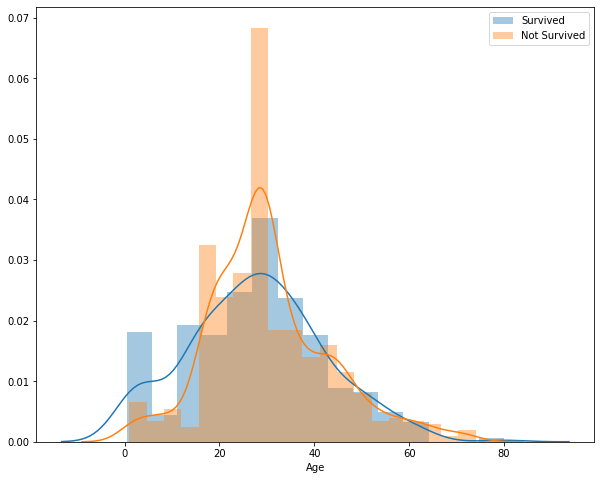

In [78]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['Survived']==1,'Age'],label='Survived')
sns.distplot(df.loc[df['Survived']==0,'Age'],label='Not Survived')
plt.legend()

I tmakes sense that babies/children survived more, and certain age groups had more chances of death than survival, so it makes sense to bin ages and group them.

In [79]:
df['BinAges']=pd.cut(df['Age'],bins=10)

In [80]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,BinAges
0,0,3,Mr,0,22.000000,1,0,7.2500,S,1,"(16.336, 24.294]"
1,1,1,Mrs,1,38.000000,1,0,71.2833,C,1,"(32.252, 40.21]"
2,1,3,Ms,1,26.000000,0,0,7.9250,S,0,"(24.294, 32.252]"
3,1,1,Mrs,1,35.000000,1,0,53.1000,S,1,"(32.252, 40.21]"
4,0,3,Mr,0,35.000000,0,0,8.0500,S,0,"(32.252, 40.21]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,0,27.000000,0,0,13.0000,S,0,"(24.294, 32.252]"
887,1,1,Ms,1,19.000000,0,0,30.0000,S,0,"(16.336, 24.294]"
888,0,3,Ms,1,17.810811,1,2,23.4500,S,3,"(16.336, 24.294]"
889,1,1,Mr,0,26.000000,0,0,30.0000,C,0,"(24.294, 32.252]"


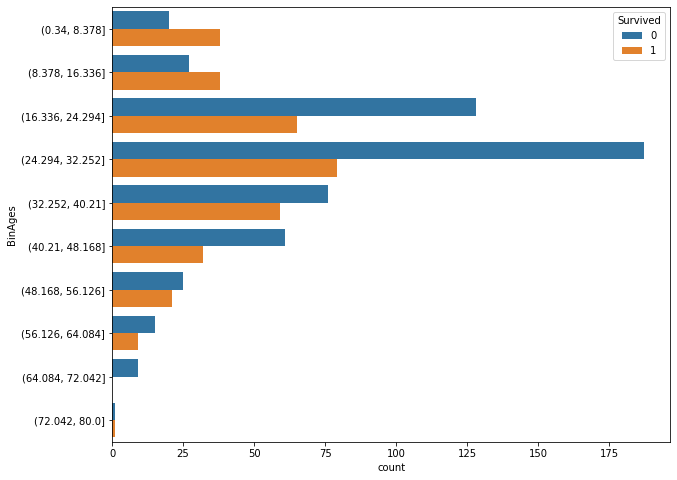

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['BinAges'],hue=df['Survived'])

As seen from the binned graph, some ranges of ages have higher chnaces of survival, while most of the other ranges don;t.

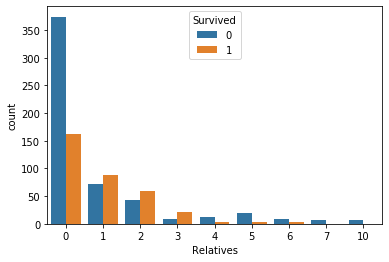

In [82]:
sns.countplot(df['Relatives'],hue=df['Survived'])

It is observed that those with 1,2 or 3 relatives did have a higher chance of survival than the most extreme relative count cases.

In [83]:
df['TotalTravellers']=df['Relatives']+1

In [84]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,BinAges,TotalTravellers
0,0,3,Mr,0,22.000000,1,0,7.2500,S,1,"(16.336, 24.294]",2
1,1,1,Mrs,1,38.000000,1,0,71.2833,C,1,"(32.252, 40.21]",2
2,1,3,Ms,1,26.000000,0,0,7.9250,S,0,"(24.294, 32.252]",1
3,1,1,Mrs,1,35.000000,1,0,53.1000,S,1,"(32.252, 40.21]",2
4,0,3,Mr,0,35.000000,0,0,8.0500,S,0,"(32.252, 40.21]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,0,27.000000,0,0,13.0000,S,0,"(24.294, 32.252]",1
887,1,1,Ms,1,19.000000,0,0,30.0000,S,0,"(16.336, 24.294]",1
888,0,3,Ms,1,17.810811,1,2,23.4500,S,3,"(16.336, 24.294]",4
889,1,1,Mr,0,26.000000,0,0,30.0000,C,0,"(24.294, 32.252]",1


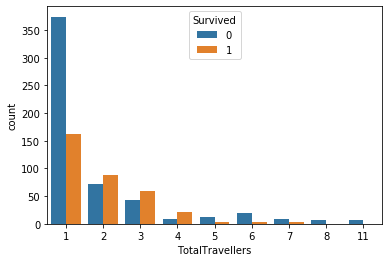

In [85]:
sns.countplot(df['TotalTravellers'],hue=df['Survived'])

All in all, a small family had a higher chance of survival, than a medium sized family or a large family.

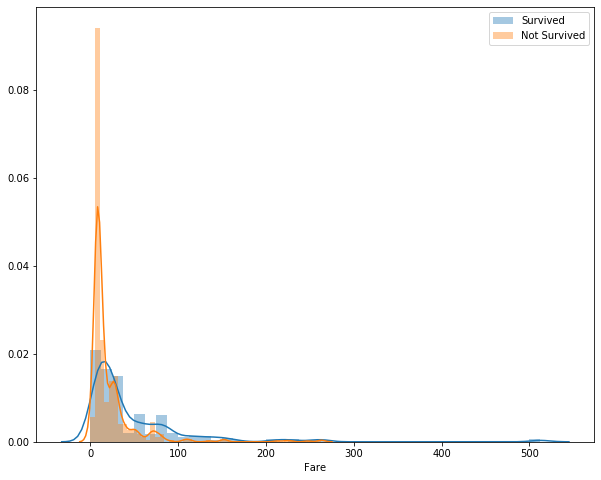

In [86]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['Survived']==1,'Fare'],label='Survived')
sns.distplot(df.loc[df['Survived']==0,'Fare'],label='Not Survived')
plt.legend()

Certain guys towards the lower 100s range might have had a higher survival rate because of their high Fare charges.

In [87]:
df['FareBin']=pd.qcut(df['Fare'],q=4)

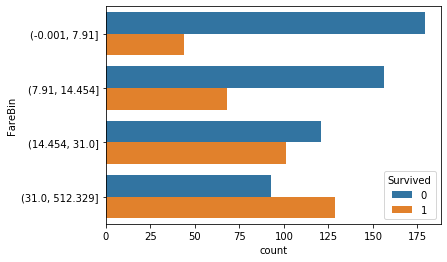

In [88]:
sns.countplot(y=df['FareBin'],hue=df['Survived'])

As we see, higher Fare=more chance of survival

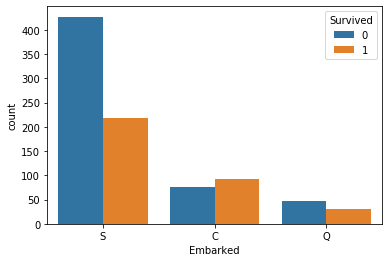

In [89]:
sns.countplot(df['Embarked'],hue=df['Survived'])

In [90]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.727107
2    29.964235
3    25.145666
Name: Age, dtype: float64

In [91]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

So, C station had a higher average Fare. So, suffice to say that C had more 1st Class passengers.

In [92]:
df.groupby('Embarked')['Age'].mean()

Embarked
C    30.941822
Q    24.478895
S    29.631417
Name: Age, dtype: float64

In [93]:
df

,Survived,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,BinAges,TotalTravellers,FareBin
0,0,3,Mr,0,22.000000,1,0,7.2500,S,1,"(16.336, 24.294]",2,"(-0.001, 7.91]"
1,1,1,Mrs,1,38.000000,1,0,71.2833,C,1,"(32.252, 40.21]",2,"(31.0, 512.329]"
2,1,3,Ms,1,26.000000,0,0,7.9250,S,0,"(24.294, 32.252]",1,"(7.91, 14.454]"
3,1,1,Mrs,1,35.000000,1,0,53.1000,S,1,"(32.252, 40.21]",2,"(31.0, 512.329]"
4,0,3,Mr,0,35.000000,0,0,8.0500,S,0,"(32.252, 40.21]",1,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Rare,0,27.000000,0,0,13.0000,S,0,"(24.294, 32.252]",1,"(7.91, 14.454]"
887,1,1,Ms,1,19.000000,0,0,30.0000,S,0,"(16.336, 24.294]",1,"(14.454, 31.0]"
888,0,3,Ms,1,17.810811,1,2,23.4500,S,3,"(16.336, 24.294]",4,"(14.454, 31.0]"
889,1,1,Mr,0,26.000000,0,0,30.0000,C,0,"(24.294, 32.252]",1,"(14.454, 31.0]"


In [94]:
X=df.drop('Survived',axis=1)

In [95]:
X.head()

,Pclass,Titles,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,BinAges,TotalTravellers,FareBin
0,3,Mr,0,22.0,1,0,7.2500,S,1,"(16.336, 24.294]",2,"(-0.001, 7.91]"
1,1,Mrs,1,38.0,1,0,71.2833,C,1,"(32.252, 40.21]",2,"(31.0, 512.329]"
2,3,Ms,1,26.0,0,0,7.9250,S,0,"(24.294, 32.252]",1,"(7.91, 14.454]"
3,1,Mrs,1,35.0,1,0,53.1000,S,1,"(32.252, 40.21]",2,"(31.0, 512.329]"
4,3,Mr,0,35.0,0,0,8.0500,S,0,"(32.252, 40.21]",1,"(7.91, 14.454]"


In [96]:
y=df['Survived']

In [97]:
X=X.drop(['SibSp','Parch','Titles','Relatives'],axis=1)

In [98]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,BinAges,TotalTravellers,FareBin
0,3,0,22.0,7.2500,S,"(16.336, 24.294]",2,"(-0.001, 7.91]"
1,1,1,38.0,71.2833,C,"(32.252, 40.21]",2,"(31.0, 512.329]"
2,3,1,26.0,7.9250,S,"(24.294, 32.252]",1,"(7.91, 14.454]"
3,1,1,35.0,53.1000,S,"(32.252, 40.21]",2,"(31.0, 512.329]"
4,3,0,35.0,8.0500,S,"(32.252, 40.21]",1,"(7.91, 14.454]"


In [99]:
X=X.drop(['Age','Fare'],axis=1)

In [100]:
X.head()

,Pclass,Sex,Embarked,BinAges,TotalTravellers,FareBin
0,3,0,S,"(16.336, 24.294]",2,"(-0.001, 7.91]"
1,1,1,C,"(32.252, 40.21]",2,"(31.0, 512.329]"
2,3,1,S,"(24.294, 32.252]",1,"(7.91, 14.454]"
3,1,1,S,"(32.252, 40.21]",2,"(31.0, 512.329]"
4,3,0,S,"(32.252, 40.21]",1,"(7.91, 14.454]"


In [101]:
X=pd.concat([X,pd.get_dummies(df['Embarked'])],axis=1)

In [102]:
X=pd.concat([X,pd.get_dummies(df['BinAges'])],axis=1)

In [103]:
X=pd.concat([X,pd.get_dummies(df['FareBin'])],axis=1)

In [104]:
X=pd.concat([X,pd.get_dummies(df['TotalTravellers'])],axis=1)

In [105]:
X.head()

,Pclass,Sex,Embarked,BinAges,TotalTravellers,FareBin,C,Q,S,"(0.34, 8.378]",...,"(31.0, 512.329]",1,2,3,4,5,6,7,8,11
0,3,0,S,"(16.336, 24.294]",2,"(-0.001, 7.91]",0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,C,"(32.252, 40.21]",2,"(31.0, 512.329]",1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,3,1,S,"(24.294, 32.252]",1,"(7.91, 14.454]",0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,S,"(32.252, 40.21]",2,"(31.0, 512.329]",0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,3,0,S,"(32.252, 40.21]",1,"(7.91, 14.454]",0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [106]:
X=X.drop(['Embarked','BinAges','TotalTravellers','FareBin'],axis=1)

In [107]:
X.head()

,Pclass,Sex,C,Q,S,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]",...,"(31.0, 512.329]",1,2,3,4,5,6,7,8,11
0,3,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,3,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,3,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [108]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)

In [153]:
X_train

,Pclass,Sex,C,Q,S,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]",...,"(31.0, 512.329]",1,2,3,4,5,6,7,8,11
35,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
46,3,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
453,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
291,1,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
748,1,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
767,3,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
72,2,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
235,3,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [154]:
X_test

,Pclass,Sex,C,Q,S,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]",...,"(31.0, 512.329]",1,2,3,4,5,6,7,8,11
862,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
223,3,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
84,2,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
680,3,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
535,2,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
467,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
740,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
354,3,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [155]:
y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

In [156]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [158]:
def model(algo,X_train,y_train,cv):
    m=algo.fit(X_train,y_train)
    trainacc=m.score(X_train,y_train)
    cval=(cross_val_score(algo,X,y,cv=cv)).mean()
    return trainacc,cval

# Model: Logistic Regression

In [176]:
algo=LogisticRegression()
LogAcc,LogCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(LogAcc)
print('Cross Validation Accuracy:')
print(LogCval)

Model Training Accuracy:
0.8353293413173652
Cross Validation Accuracy:
0.809271365338781


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Model:Naive Bayes using GaussianNB

In [175]:
algo=GaussianNB()
NBAcc,NBCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(NBAcc)
print('Cross Validation Accuracy:')
print(NBCval)

Model Training Accuracy:
0.4281437125748503
Cross Validation Accuracy:
0.419723924639655


# Model: SVC

In [162]:
algo=SVC()
SVCAcc,SVCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(SVCAcc)
print('Cross Validation Accuracy:')
print(SVCval)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

Model Training Accuracy:
0.8023952095808383
Cross Validation Accuracy:
0.7867106457836796


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

# Model: KNearestNeighbors

In [163]:
algo=KNeighborsClassifier()
knnAcc,knnCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(knnAcc)
print('Cross Validation Accuracy:')
print(knnCval)

Model Training Accuracy:
0.842814371257485
Cross Validation Accuracy:
0.7925414254908636


# Model: Decision Tree Classifier

In [164]:
algo=DecisionTreeClassifier()
DTAcc,DTCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(DTAcc)
print('Cross Validation Accuracy:')
print(DTCval)

Model Training Accuracy:
0.9161676646706587
Cross Validation Accuracy:
0.8092083758937691


In [165]:
feat=algo.feature_importances_

In [166]:
featimp=pd.DataFrame({'Importance':feat,'Columns':X_train.columns})

In [167]:
featimp

,Importance,Columns
0,0.159730,Pclass
1,0.388436,Sex
2,0.013765,C
3,0.000669,Q
4,0.047989,S
5,0.078353,"(0.34, 8.378]"
6,0.046913,"(8.378, 16.336]"
7,0.011096,"(16.336, 24.294]"
8,0.016294,"(24.294, 32.252]"
9,0.015650,"(32.252, 40.21]"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

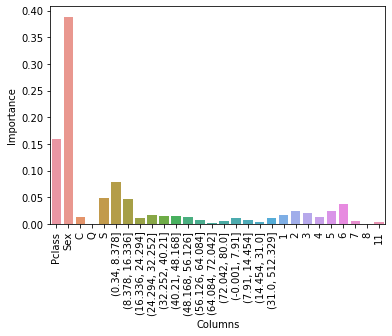

In [168]:
sns.barplot(featimp['Columns'],featimp['Importance'])
plt.xticks(rotation=90)

#  Model: Random Forests

In [169]:
algo=RandomForestClassifier()
RFAcc,RFCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(RFAcc)
print('Cross Validation Accuracy:')
print(RFCval)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Training Accuracy:
0.9131736526946108
Cross Validation Accuracy:
0.8227669958007036


# Model:XGBOOST

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
algo=GradientBoostingClassifier()
GBAcc,GBCval=model(algo,X_train,y_train,10)
print('Model Training Accuracy:')
print(GBAcc)
print('Cross Validation Accuracy:')
print(GBCval)

Model Training Accuracy:
0.875748502994012
Cross Validation Accuracy:
0.818272330041993


In [177]:
m=['Logistic Regression','Naive Bayes','Support Vectors','KNearest Neighbors','Decision Trees'
   ,'Random Forest','XGBoost']
models=pd.DataFrame({'Models':m,'Training':[LogAcc,NBAcc,SVCAcc,knnAcc,DTAcc,RFAcc,GBAcc],'Cross-Val':[LogCval,NBCval,SVCval,
                                                                                                      knnCval,DTCval,RFCval,GBCval]})

In [178]:
models

,Models,Training,Cross-Val
0,Logistic Regression,0.835329,0.809271
1,Naive Bayes,0.428144,0.419724
2,Support Vectors,0.802395,0.786711
3,KNearest Neighbors,0.842814,0.792541
4,Decision Trees,0.916168,0.809208
5,Random Forest,0.913174,0.822767
6,XGBoost,0.875749,0.818272


Random Forests seem to have had a better performance over all other classification models. So we'll pick this as our go-to model for this problem.

In [180]:
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestClassifier()
max_features=[1,2,3,5,10,15,20,25]
param_dist=dict(max_features=max_features)
rand=RandomizedSearchCV(model,param_dist,cv=10,random_state=1,scoring='roc_auc')
rand.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [181]:
rand.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
rand.best_score_

0.8631860373756459

In [183]:
y_preds=rand.predict(X_test)

In [185]:
print(accuracy_score(y_test,y_preds)*100)

87.4439461883408


In [186]:
confusion_matrix(y_test,y_preds)

array([[119,   9],
       [ 19,  76]])

In [188]:
mod=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
mod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
probs=mod.predict_proba(X_test)

In [192]:
y_probs=probs[:,1]

In [193]:
y_probs[:5]

array([0.79166667, 0.11464715, 0.6       , 0.18928571, 1.        ])

In [194]:
fpr,tpr,thresh=roc_curve(y_test,y_probs)

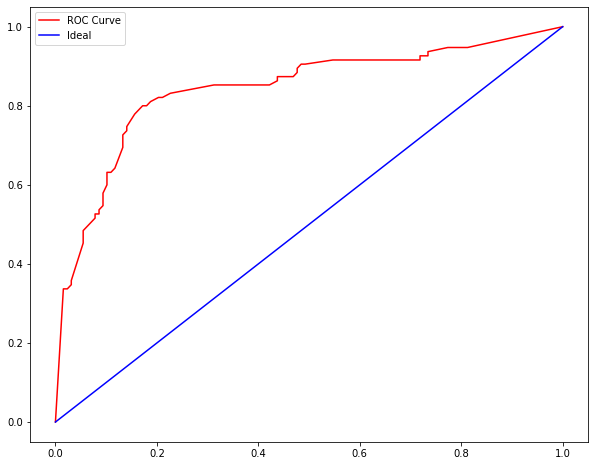

In [204]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,'r-',label='ROC Curve')
plt.plot([0,1],[0,1],'b-',label='Ideal')
plt.legend()

In [200]:
print(roc_auc_score(y_test,y_probs))

0.8423930921052633
